<a href="https://colab.research.google.com/github/niakurniawati00/FINAL-PROJECT_mini-bootcamp/blob/main/Project_Mini_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#2. Dataset


In [ ]:
## data = "https://satudata.jakarta.go.id/open-data/detail?kategori=dataset&page_url=data-jumlah-penderita-penyakit-menular-menurut-jenis-penyakit-di-provinsi-dki-jakarta&data_no=1"

In [ ]:
df = pd.read_csv('/content/Data Jumlah Penderita Penyakit Menular menurut Jenis Penyakit di Provinsi DKI Jakarta - Data Jumlah Penderita Penyakit Menular menurut Jenis Penyakit di Provinsi DKI Jakarta.csv')


df.head()

,tahun,wilayah,nama_penyakit,jumlah_penderita,periode_data
0,2018,Jakarta Utara,TBC,5208,2018
1,2018,Kepulauan Seribu,DBD,8,2018
2,2018,Jakarta Selatan,DBD,626,2018
3,2018,Jakarta Timur,DBD,797,2018
4,2018,Jakarta Pusat,DBD,112,2018


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             216 non-null    int64 
 1   wilayah           216 non-null    object
 2   nama_penyakit     216 non-null    object
 3   jumlah_penderita  216 non-null    int64 
 4   periode_data      216 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 8.6+ KB


In [ ]:
#mengubah dtype tahun
df["tahun"] = pd.to_datetime(df["tahun"], format="%Y")
df = df.sort_values(by=['tahun']) #dikarenankan data tidak berurutan

In [ ]:
#mengubah dtype.periodedate
df['periode_data'] = pd.to_datetime(df['periode_data'])

In [ ]:
df.describe()

,tahun,jumlah_penderita,periode_data
count,216,216.000000,216.000000
mean,2017-07-02 04:00:00,1607.620370,2017.500000
min,2015-01-01 00:00:00,0.000000,2015.000000
25%,2016-01-01 00:00:00,1.750000,2016.000000
50%,2017-07-02 12:00:00,42.500000,2017.500000
75%,2019-01-01 00:00:00,2307.000000,2019.000000
max,2020-01-01 00:00:00,13167.000000,2020.000000
std,NaN,2816.531605,1.711792


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 135 to 107
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tahun             216 non-null    datetime64[ns]
 1   wilayah           216 non-null    object        
 2   nama_penyakit     216 non-null    object        
 3   jumlah_penderita  216 non-null    int64         
 4   periode_data      216 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 10.1+ KB


#Data Visualization

   Tahun  Jumlah Penderita
0   2015             28499
1   2016             49186
2   2017             71012
3   2018             73871
4   2019             82363
5   2020             42315


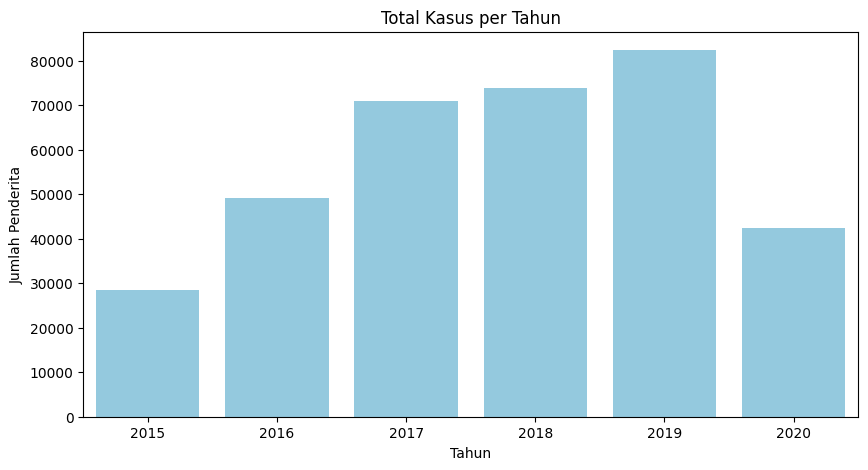

In [ ]:
#Case every year
cases_year = df.groupby(df["tahun"].dt.year)["jumlah_penderita"].sum().reset_index()
cases_year.columns = ['Tahun', 'Jumlah Penderita']
print(cases_year)

# Visualize the data
plt.figure(figsize=(10, 5))
sns.barplot(x='Tahun', y='Jumlah Penderita', data=cases_per_year, color="skyblue")
plt.title("Total Kasus per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penderita")
plt.show()

            wilayah  jumlah_penderita
0     Jakarta Barat             76418
1     Jakarta Pusat             46002
2   Jakarta Selatan             64167
3     Jakarta Timur            110252
4     Jakarta Utara             50019
5  Kepulauan Seribu               388


<ipython-input-226-fc80dc84e221>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="wilayah", y="jumlah_penderita", data=jumlah_per_wilayah, palette="viridis")


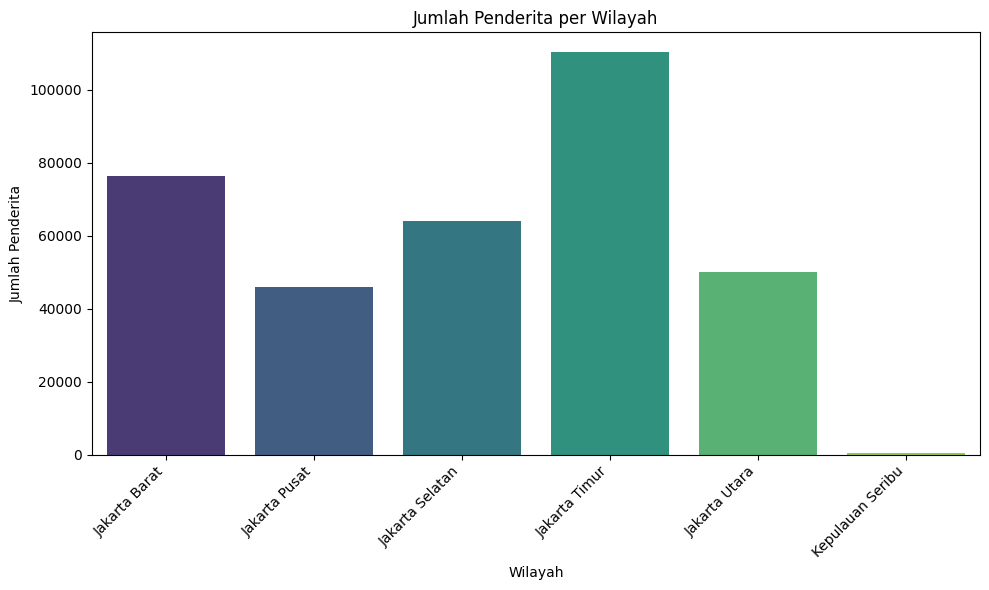

In [ ]:
# Mengetahui willayah dengan jumlah penderita
jumlah_per_wilayah = df.groupby("wilayah")["jumlah_penderita"].sum().reset_index()
print(jumlah_per_wilayah)

# 3. Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x="wilayah", y="jumlah_penderita", data=jumlah_per_wilayah, palette="viridis")
plt.title("Jumlah Penderita per Wilayah")
plt.xlabel("Wilayah")
plt.ylabel("Jumlah Penderita")
plt.xticks(rotation=45, ha='right')
plt.show()

     Nama Penyakit  Jumlah Penderita
0              DBD             44929
1  Gastro Entritis            111047
2           Kolera               162
3            Kusta              2196
4          Malaria               311
5              TBC            188601


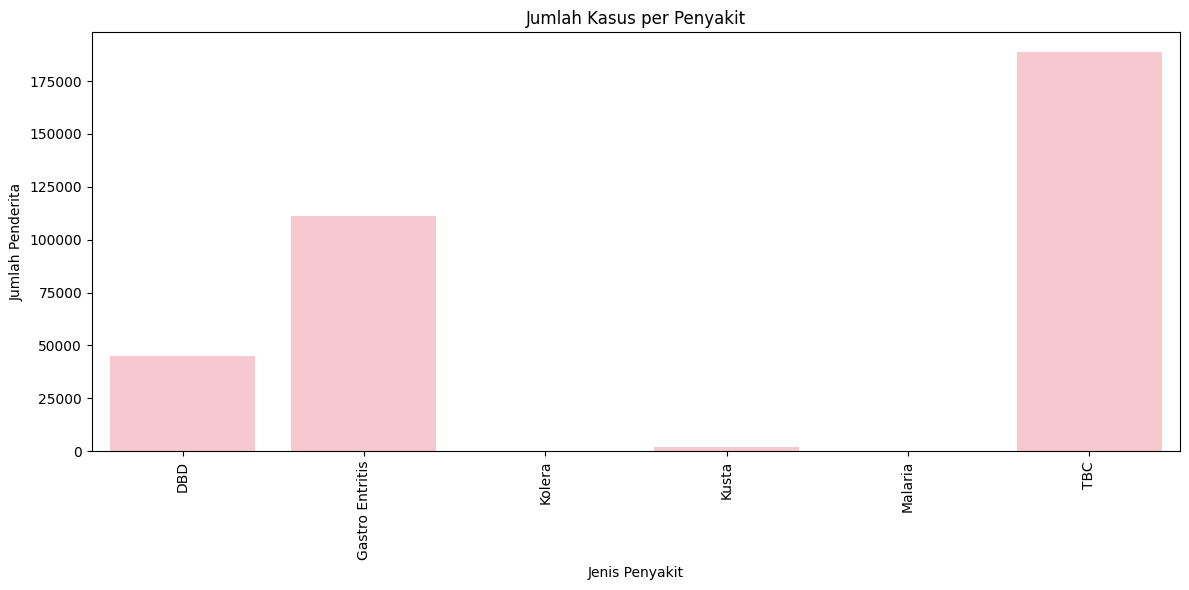

In [ ]:
#Penyakit yang beredar di Masyarkat
jumlah_kasus_seluruh = df.groupby("nama_penyakit")["jumlah_penderita"].sum().reset_index()
jumlah_kasus_seluruh.columns = ['Nama Penyakit', 'Jumlah Penderita']  # Rename columns
print(cases_per_disease)

# Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Nama Penyakit', y='Jumlah Penderita', data=cases_per_disease, color="pink")
plt.title("Jumlah Kasus per Penyakit")
plt.xlabel("Jenis Penyakit")
plt.ylabel("Jumlah Penderita")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

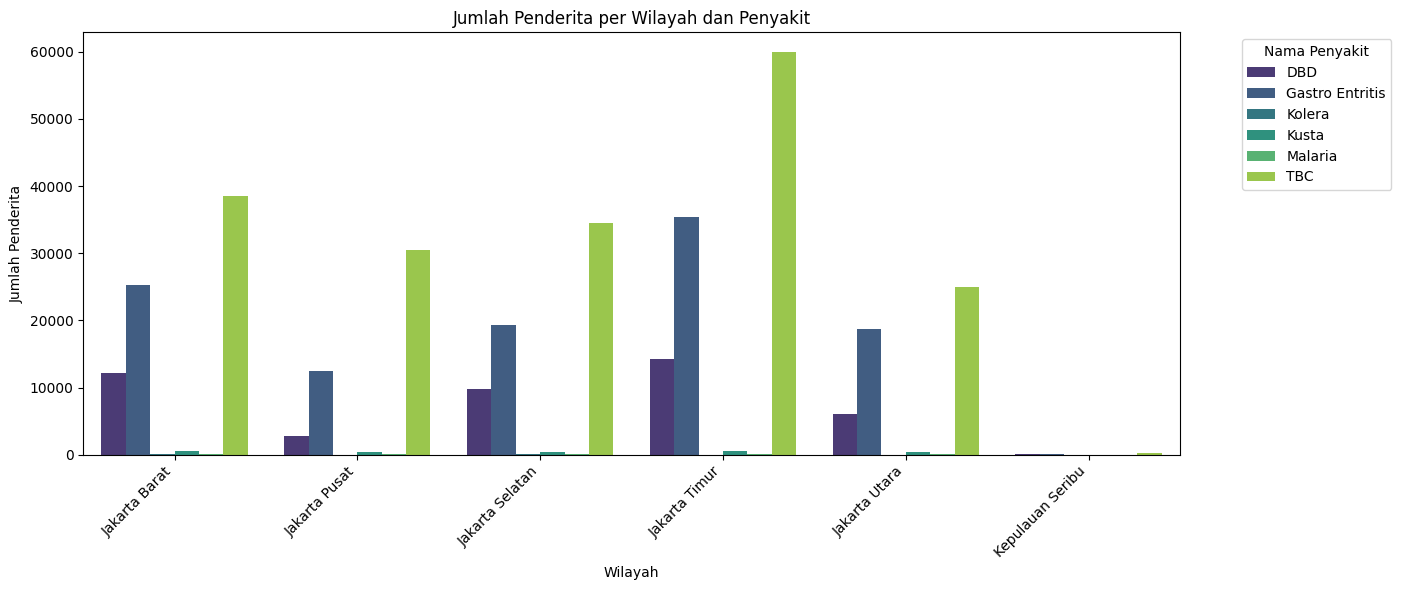

In [ ]:
# Menampilkan jumlah penderita berdasarkan wilayah dan penyakit

# Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(x="wilayah", y="jumlah_penderita", hue="nama_penyakit", data=jumlah_per_wilayah_penyakit, palette="viridis")
plt.title("Jumlah Penderita per Wilayah dan Penyakit")
plt.xlabel("Wilayah")
plt.ylabel("Jumlah Penderita")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title="Nama Penyakit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

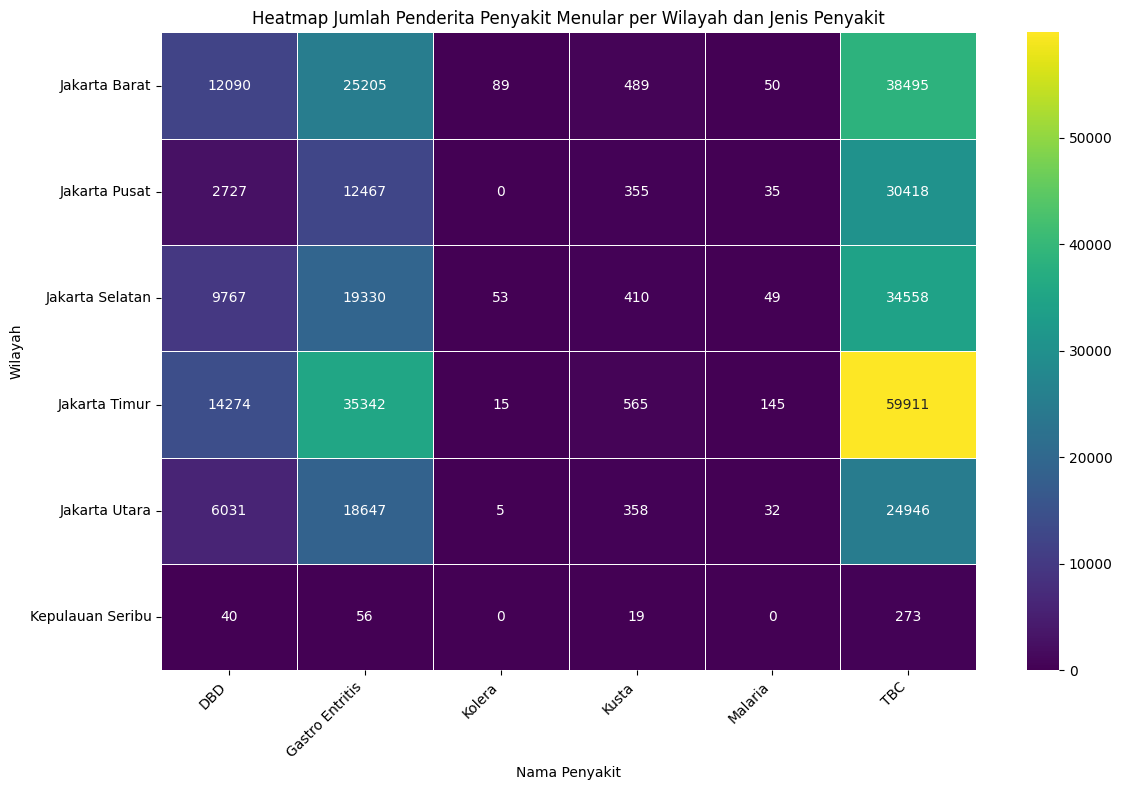

In [ ]:
# Correlation Heatmap
heatmap_data = pd.pivot_table(df, values='jumlah_penderita',
                           index='wilayah', columns='nama_penyakit',
                           aggfunc='sum', fill_value=0)

# 2. Buat heatmap
plt.figure(figsize=(12, 8))  # Atur ukuran gambar
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="viridis", linewidths=.5)
plt.title("Heatmap Jumlah Penderita Penyakit Menular per Wilayah dan Jenis Penyakit")
plt.xlabel("Nama Penyakit")
plt.ylabel("Wilayah")
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()
plt.show()


#Conclusion
Model ini dapat digunakan untuk memprediksi jumlah penderita berdasarkan tahun, wilayah, dan jenis penyakit.
Model menunjukkan performa yang cukup baik dengan evaluasi berdasarkan metrik akurasi dan confusion matrix.
Berbagai visualisasi juga telah dibuat untuk memahami pola distribusi penyakit dan persebarannya.
Data jumlah penderita per penyakit telah ditampilkan dalam bentuk tabel dan grafik.


In [ ]:
file_output = "data_penyakit_menular_cleaned.csv"
df.to_csv(file_output, index=False)

# Download file ke lokal
from google.colab import files
files.download(file_output)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>